In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [80]:
ser=serial.Serial("/dev/ttyACM0",115200,timeout=0.2)
ser.baudrate=115200

In [81]:
def read():
    F = []
    while True: # Run forever
        read_ser=ser.readline()
        if (read_ser != b''):
            F.append(read_ser)
        else:
            break
    return F

In [82]:
ser.write(bytearray(str("offset 255\n"),'ascii'))
read()

[b'offset 255\r\n',
 b'Writing 255 to DAC\r\n',
 b'DAC writing ended\r\n',
 b'run> ']

In [83]:
ser.write(bytearray('start\n','ascii'))
A = read()
A

[b'start\r\n',
 b'Acquistion of 8000 samples started\r\n',
 b'Acquistion completed\r\n',
 b'run> ']

In [84]:
ser.write(bytearray('read\n','ascii'))
A = read()
A

[b'read\r\n',
 b'----------Start of ACQ----------\r\n',
 b'FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,FF,EF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

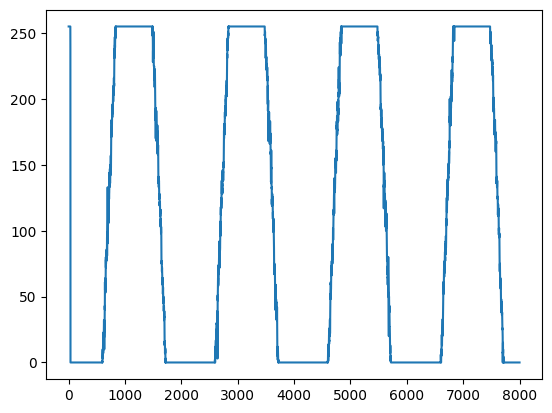

In [85]:
S = str(A[2])[2:].split(",")[:-1]
signal = [int(x,16) for x in S]
plt.plot(signal)

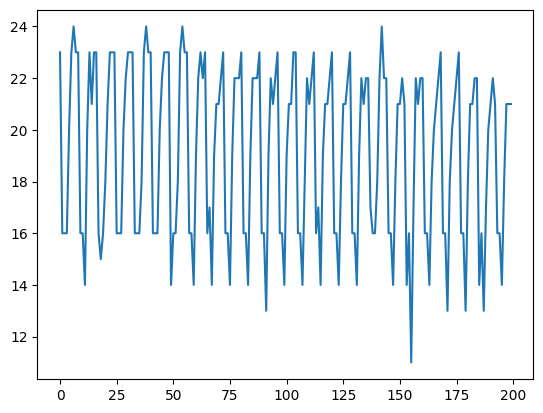

In [70]:
plt.plot(signal[4200:4400])